# Import libraries

In [55]:
import numpy as np
import scipy.stats as st
import itertools
import pandas as pd
npPath = '/sharedData/scratch/all_npy3/'
ncPath = '/sharedData/scratch/april_data/'
acmPath = '/sharedData/scratch/all_npy3/'
DATAPATH = '/sharedData/scratch/'
import re
import os
from os import path as op
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import netCDF4
from pathlib import Path

#refactor to create folders using subprocess library
#from subprocess import

import matplotlib.dates as mdates
from datetime import datetime

In [56]:
def getTmean(SS, npPath, band, day):
   
    ncList = os.listdir( ncPath )
    npList = os.listdir( npPath )
    
    look = 'M6C'+ band + '_G' + SS + '_s2019' + day
    acmLook = 'M6_G' + SS + '_s2019' + day
    
    ncFiles = sorted([f for f in ncList if re.search(look,f)])
    npFiles = sorted([f for f in npList if re.search(look,f)])
    
    plot = createUnfilteredPlotArray(ncFiles,npFiles,npPath)
    return plot

In [57]:
def getFilteredTmean(SS, npPath, band, day):
   
    ncList = os.listdir( ncPath )
    npList = os.listdir( npPath )
    acmList = os.listdir( acmPath )
    
    look = 'M6C'+ band + '_G' + SS + '_s2019' + day
    acmLook = 'M6_G' + SS + '_s2019' + day
    
    ncFiles = sorted([f for f in ncList if re.search(look,f)])
    npFiles = sorted([f for f in npList if re.search(look,f)])
    acmFiles = sorted([f for f in acmList if re.search(acmLook,f)])
    plot = createFilteredPlotArray(ncFiles,npFiles,npPath,acmFiles)
    return plot


In [58]:
def Rad2BT(rad, planck_fk1, planck_fk2, planck_bc1, planck_bc2):
    """Radiances to Brightness Temprature (using black body equation)"""
    invRad = np.array(rad)**(-1)
    arg = (invRad*planck_fk1) + 1.0
    T = (- planck_bc1+(planck_fk2 * (np.log(arg)**(-1))) )*(1/planck_bc2) 
    return T

In [59]:
def createFilteredPlotArray(ncFiles,npFiles,npPath,acmFiles):#Filtered Histrogram for cloud clear sky mask
    Tmean= []
    times = []
    for ncf, npf, acm in zip(ncFiles, npFiles, acmFiles):
        imageBox = np.load(op.join(npPath,npf))
        acmBox = np.load(op.join(acmPath,acm))
        myFile = xr.open_dataset(op.join(ncPath,ncf))
        planck_fk1 = float(myFile['planck_fk1'].data)
        planck_fk2 = float(myFile['planck_fk2'].data) 
        planck_bc1 = float(myFile['planck_bc1'].data)                       
        planck_bc2 = float(myFile['planck_bc2'].data)     
        T = Rad2BT(imageBox[acmBox==1].mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
        tString = ncf[34:38]
        times.append(tString)
        Tmean.append(T)
    return times, Tmean
    

In [60]:
def createUnfilteredPlotArray(ncFiles,npFiles,npPath):#Filtered Histrogram for cloud clear sky mask
    Tmean= []
    times = []
    for ncf, npf in zip(ncFiles, npFiles):
        imageBox = np.load(op.join(npPath,npf))
        myFile = xr.open_dataset(op.join(ncPath,ncf))
        planck_fk1 = float(myFile['planck_fk1'].data)
        planck_fk2 = float(myFile['planck_fk2'].data) 
        planck_bc1 = float(myFile['planck_bc1'].data)                       
        planck_bc2 = float(myFile['planck_bc2'].data)     
        T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
        tString = ncf[31:38]
        times.append(tString)
        Tmean.append(T)
    return times, Tmean




In [61]:
'''
for i in [8]:
    d16=pd.DataFrame()
    d17=pd.DataFrame()
    for j in range(11):
        band = str(i).zfill(2)
        date = 98 + j
        day = str(date).zfill(3)
        
        times17, mean17 = getTmean('17', npPath, band, day)
        times16, mean16 = getTmean('16', npPath, band, day)
        
        dframe17=pd.DataFrame(index=times17,data=np.array(mean17),columns=['Mean_temp (K)'])
        dframe16=pd.DataFrame(index=times16,data=np.array(mean16),columns=['Mean_temp (K)'])
        
        d17=d17.append(dframe17)
        d16=d16.append(dframe16)
        
d16.index.name='Time (DDDHHmm)'
d17.index.name='Time (DDDHHmm)'

d16.to_csv("G16series.csv")
d17.to_csv("G17series.csv")
'''

'\nfor i in [8]:\n    d16=pd.DataFrame()\n    d17=pd.DataFrame()\n    for j in range(11):\n        band = str(i).zfill(2)\n        date = 98 + j\n        day = str(date).zfill(3)\n        \n        times17, mean17 = getTmean(\'17\', npPath, band, day)\n        times16, mean16 = getTmean(\'16\', npPath, band, day)\n        \n        dframe17=pd.DataFrame(index=times17,data=np.array(mean17),columns=[\'Mean_temp (K)\'])\n        dframe16=pd.DataFrame(index=times16,data=np.array(mean16),columns=[\'Mean_temp (K)\'])\n        \n        d17=d17.append(dframe17)\n        d16=d16.append(dframe16)\n        \nd16.index.name=\'Time (DDDHHmm)\'\nd17.index.name=\'Time (DDDHHmm)\'\n\nd16.to_csv("G16series.csv")\nd17.to_csv("G17series.csv")\n'

In [62]:
def getUnfilteredTmean(SS, ncPath, npPath, band, day):
   
    ncList = os.listdir( ncPath )
    npList = os.listdir( npPath )
    
    look = 'M6C'+ band + '_G' + SS + '_s2019' + day
    
    ncFiles = sorted([f for f in ncList if re.search(look,f)])
    npFiles = sorted([f for f in npList if re.search(look,f)])
    plot = createUnfilteredPlotArray(ncFiles,npFiles,npPath)
    return plot

In [63]:
'''
Tmean = []
times = []
toi = ['0300','0910','1010','1350','1510','2100']
for (bb,dd) in list(itertools.product([8],range(11))):
    for SS in ['16','17']:
        bins = np.linspace(220,250,101)
        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)
        fig.suptitle(f'GOES-{SS} ABI Band {bb} {8+dd}-Apr-2019', fontsize = 22, fontweight = 'bold')
        BB = str(bb).zfill(2)
        lookup = f'M6C{BB}_G{SS}_s2019{DD}'
        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]

        for ncf, npf in zip(ncFiles,npFiles):
            imageBox = np.load(op.join(npPath,npf))
            myFile = xr.open_dataset(op.join(ncPath,ncf))
            planck_fk1 = float(myFile['planck_fk1'].data)
            planck_fk2 = float(myFile['planck_fk2'].data) 
            planck_bc1 = float(myFile['planck_bc1'].data)                       
            planck_bc2 = float(myFile['planck_bc2'].data)     
            T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)#unfilterd
            tString = ncf[34:38]
            times.append(tString)
            Tmean.append(T)

            if tString in toi:
                ax = axes[toi.index(tString)]
                hh = tString[:2]
                mm = tString[2:4]
                ax.set_title(f'{hh}:{mm}')
                ax.set_ylabel('density (unitless)',fontsize = 16)
                ax.set_xlabel('Temperature (K)', fontsize = 16)

                Tbox = Rad2BT(imageBox, planck_fk1, planck_fk2, planck_bc1, planck_bc2)
                ax.hist(Tbox.ravel(), bins = bins, density = True, label = 'Temp dist.')
                #ax.plot([T,T], [0,0.3],'r', label = 'something')
                ax.axvline(T, color='r',label = 'NOAA avg.')
            axes[0].legend(loc='upper left')
        fig.savefig('..'+ op.join(DATAPATH,f"Histograms_unfiltered/G_{SS}_band{BB}_04-{str(8+dd).zfill(2)}-2019"))
'''

'\nTmean = []\ntimes = []\ntoi = [\'0300\',\'0910\',\'1010\',\'1350\',\'1510\',\'2100\']\nfor (bb,dd) in list(itertools.product([8],range(11))):\n    for SS in [\'16\',\'17\']:\n        bins = np.linspace(220,250,101)\n        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)\n        fig.suptitle(f\'GOES-{SS} ABI Band {bb} {8+dd}-Apr-2019\', fontsize = 22, fontweight = \'bold\')\n        BB = str(bb).zfill(2)\n        lookup = f\'M6C{BB}_G{SS}_s2019{DD}\'\n        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]\n        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]\n\n        for ncf, npf in zip(ncFiles,npFiles):\n            imageBox = np.load(op.join(npPath,npf))\n            myFile = xr.open_dataset(op.join(ncPath,ncf))\n            planck_fk1 = float(myFile[\'planck_fk1\'].data)\n            planck_fk2 = float(myFile[\'planck_fk2\'].data) \n            planck_bc1 = float(myFile[\'

# Plots for April 8 through 18 (unfiltered).

In [64]:
'''
for i in [8]:
    for j in range(11):
        band = str(i).zfill(2)
        date = 98 + j
        day = str(date).zfill(3)
        
        times17, mean17 = getTmean('17', npPath, band, day)
        times16, mean16 = getTmean('16', npPath, band, day)
        
        ptimes17 = [datetime.strptime(f"2019{t}", "%Y%j%H%M") for t in times17]
        ptimes16 = [datetime.strptime(f"2019{t}", "%Y%j%H%M") for t in times16]
        fig, ax1 = plt.subplots(figsize=(15,5))#constrained_layout=False
        _ = ax1.plot_date(ptimes17, mean17 , label="GOES-17", color='tab:red', marker='+', markersize = 16)
        _ = ax1.plot_date(ptimes16, mean16 , label='GOES-16', color='tab:blue', marker='+', markersize = 16, zorder=-1)
        _ = ax1.set_ylim(220,260)
        _ = ax1.tick_params('both', labelsize=18)
        _ = ax1.legend()
        _ = ax1.set_title(f'Mean Temperatures (K) for a 401 x 1001 Portion\n of Band 08 on 04-{str(8+j)}-2019', fontweight ='bold', fontsize = 22)
        _ = ax1.set_ylabel('Temperature (K)',fontsize = 16)
        _ = ax1.set_xlabel('time (hours)',fontsize = 16)
        _ = ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        
        
        _ = plt.savefig('..'+ op.join(DATAPATH,f"Mean_temp_unfiltered/04-{str(8+j).zfill(2)}-2019"))
'''       

'\nfor i in [8]:\n    for j in range(11):\n        band = str(i).zfill(2)\n        date = 98 + j\n        day = str(date).zfill(3)\n        \n        times17, mean17 = getTmean(\'17\', npPath, band, day)\n        times16, mean16 = getTmean(\'16\', npPath, band, day)\n        \n        ptimes17 = [datetime.strptime(f"2019{t}", "%Y%j%H%M") for t in times17]\n        ptimes16 = [datetime.strptime(f"2019{t}", "%Y%j%H%M") for t in times16]\n        fig, ax1 = plt.subplots(figsize=(15,5))#constrained_layout=False\n        _ = ax1.plot_date(ptimes17, mean17 , label="GOES-17", color=\'tab:red\', marker=\'+\', markersize = 16)\n        _ = ax1.plot_date(ptimes16, mean16 , label=\'GOES-16\', color=\'tab:blue\', marker=\'+\', markersize = 16, zorder=-1)\n        _ = ax1.set_ylim(220,260)\n        _ = ax1.tick_params(\'both\', labelsize=18)\n        _ = ax1.legend()\n        _ = ax1.set_title(f\'Mean Temperatures (K) for a 401 x 1001 Portion\n of Band 08 on 04-{str(8+j)}-2019\', fontweight =\'bold

# Plots for April 8 through 18 (filtered) combined Histograms

In [65]:
'''
Tmean = []
times = []
toi = ['0300','0910','1010','1350','1510','2100']
for (bb,dd) in list(itertools.product([8],range(11))):
    for SS in ['16','17']:
        bins = np.linspace(220,250,101)
        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)
        fig.suptitle(f'GOES-{SS} ABI Band 8 {8+dd}-Apr-2019', fontsize = 22, fontweight = 'bold')
        DD = str(98+dd).zfill(3)
        lookup = f'M6C08_G{SS}_s2019{DD}'
        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]

        for ncf, npf in zip(ncFiles,npFiles):
            imageBox = np.load(op.join(npPath,npf))
            myFile = xr.open_dataset(op.join(ncPath,ncf))
            planck_fk1 = float(myFile['planck_fk1'].data)
            planck_fk2 = float(myFile['planck_fk2'].data) 
            planck_bc1 = float(myFile['planck_bc1'].data)                       
            planck_bc2 = float(myFile['planck_bc2'].data)     
            T = Rad2BT(imageBox[acmBox==1].mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)
            tString = ncf[34:38]
            times.append(tString)
            Tmean.append(T)

            if tString in toi:
                ax = axes[toi.index(tString)]
                hh = tString[:2]
                mm = tString[2:4]
                ax.set_title(f'{hh}:{mm}')
                ax.set_ylabel('density (unitless)',fontsize = 16)
                ax.set_xlabel('Temperature (K)', fontsize = 16)

                Tbox = Rad2BT(imageBox, planck_fk1, planck_fk2, planck_bc1, planck_bc2)
                ax.hist(Tbox.ravel(), bins = bins, density = True, label = 'Temp dist.')
                #ax.plot([T,T], [0,0.3],'r', label = 'something')
                ax.axvline(T, color='r',label = 'NOAA avg.')
            axes[0].legend(loc='upper left')
        fig.savefig('..'+ op.join(DATAPATH,f"Histograms_filtered/G_{SS}_04-{str(8+dd).zfill(2)}-2019"))
        '''

'\nTmean = []\ntimes = []\ntoi = [\'0300\',\'0910\',\'1010\',\'1350\',\'1510\',\'2100\']\nfor (bb,dd) in list(itertools.product([8],range(11))):\n    for SS in [\'16\',\'17\']:\n        bins = np.linspace(220,250,101)\n        fig, axes = plt.subplots(ncols=6, nrows =1, figsize=(15, 5), constrained_layout=True, sharey = True, sharex = True)\n        fig.suptitle(f\'GOES-{SS} ABI Band 8 {8+dd}-Apr-2019\', fontsize = 22, fontweight = \'bold\')\n        DD = str(98+dd).zfill(3)\n        lookup = f\'M6C08_G{SS}_s2019{DD}\'\n        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]\n        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]\n\n        for ncf, npf in zip(ncFiles,npFiles):\n            imageBox = np.load(op.join(npPath,npf))\n            myFile = xr.open_dataset(op.join(ncPath,ncf))\n            planck_fk1 = float(myFile[\'planck_fk1\'].data)\n            planck_fk2 = float(myFile[\'planck_fk2\'].data) \n            planck_bc1 = float(myFile[\'pl

# Plots for April 8 through 18 (filtered 10min.) Histograms

In [66]:
'''
for (bb,dd) in list(itertools.product([8],range(11))):
    for SS in ['16','17']:
        BB = str(bb).zfill(2)
        DD = str(98+dd).zfill(3)
        lookup = f'M6C08_G{SS}_s2019{DD}'
        acmLook = 'M6_G' + SS + '_s2019' + DD
        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]
        acmFiles = [f for f in os.listdir(acmPath) if re.search(acmLook,f)]

        for ncf, npf, acm in zip(ncFiles, npFiles, acmFiles):
            bins = np.linspace(220,250,101)
            
            imageBox = np.load(op.join(npPath,npf))
            acmBox = np.load(op.join(acmPath,acm))
            
            myFile = xr.open_dataset(op.join(ncPath,ncf))
            planck_fk1 = float(myFile['planck_fk1'].data)
            planck_fk2 = float(myFile['planck_fk2'].data) 
            planck_bc1 = float(myFile['planck_bc1'].data)                       
            planck_bc2 = float(myFile['planck_bc2'].data)     
            T = Rad2BT(imageBox[acmBox==1], planck_fk1, planck_fk2, planck_bc1, planck_bc2)
            tString = ncf[34:38]
            
            hh = tString[:2]
            mm = tString[2:4]
            
            fig, ax = plt.subplots(ncols=1, nrows =1, figsize=(15, 5), constrained_layout=True, 
                                     sharey = True, sharex = True)
            fig.suptitle(f'GOES-{SS} ABI Band 8 {8+dd}-Apr-2019 {hh}:{mm} (filtered 10min.)', fontsize = 22, 
                         fontweight = 'bold')
            
            ax.set_title(f'{hh}:{mm}')
            ax.set_ylabel('density (unitless)', fontsize = 16)
            ax.set_xlabel('Temperature (K)', fontsize = 16)

            ax.hist(T.ravel(), bins = bins, density = True, label = 'Temp dist.')
            ax.axvline(T.ravel().mean(), color='r', label = 'NOAA avg.')
            ax.legend(loc='upper left')
            
            fig.savefig('..'+ op.join(DATAPATH, f"Histograms_filtered/G{SS}B{BB}_{DD}{hh}{mm}2019"))
'''            

'\nfor (bb,dd) in list(itertools.product([8],range(11))):\n    for SS in [\'16\',\'17\']:\n        BB = str(bb).zfill(2)\n        DD = str(98+dd).zfill(3)\n        lookup = f\'M6C08_G{SS}_s2019{DD}\'\n        acmLook = \'M6_G\' + SS + \'_s2019\' + DD\n        ncFiles = [f for f in os.listdir(ncPath) if re.search(lookup,f)]\n        npFiles = [f for f in os.listdir(npPath) if re.search(lookup,f)]\n        acmFiles = [f for f in os.listdir(acmPath) if re.search(acmLook,f)]\n\n        for ncf, npf, acm in zip(ncFiles, npFiles, acmFiles):\n            bins = np.linspace(220,250,101)\n            \n            imageBox = np.load(op.join(npPath,npf))\n            acmBox = np.load(op.join(acmPath,acm))\n            \n            myFile = xr.open_dataset(op.join(ncPath,ncf))\n            planck_fk1 = float(myFile[\'planck_fk1\'].data)\n            planck_fk2 = float(myFile[\'planck_fk2\'].data) \n            planck_bc1 = float(myFile[\'planck_bc1\'].data)                       \n            pl

# Validation for April 8 through 18 (unfiltered 10min.) Validation

In [67]:
'''
for (bb,dd) in list(itertools.product([8],range(11))):
    BB = str(bb).zfill(2)
    DD = str(98+dd).zfill(3)
    lookup16 = f'M6C{BB}_G16_s2019{DD}'
    ncFiles16 = [f for f in os.listdir(ncPath) if re.search(lookup,f)]
    npFiles16 = [f for f in os.listdir(npPath) if re.search(lookup,f)]
    
    for ncf16, npf16 in zip(ncFiles16,npFiles16):
        imageBox = np.load(op.join(npPath,npf16))
        myFile = xr.open_dataset(op.join(ncPath,ncf16))
        planck_fk1 = float(myFile['planck_fk1'].data)
        planck_fk2 = float(myFile['planck_fk2'].data) 
        planck_bc1 = float(myFile['planck_bc1'].data)                       
        planck_bc2 = float(myFile['planck_bc2'].data)     
        T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)#unfilterd
        tString = ncf[34:38]
            
'''
        

"\nfor (bb,dd) in list(itertools.product([8],range(11))):\n    BB = str(bb).zfill(2)\n    DD = str(98+dd).zfill(3)\n    lookup16 = f'M6C{BB}_G16_s2019{DD}'\n    ncFiles16 = [f for f in os.listdir(ncPath) if re.search(lookup,f)]\n    npFiles16 = [f for f in os.listdir(npPath) if re.search(lookup,f)]\n    \n    for ncf16, npf16 in zip(ncFiles16,npFiles16):\n        imageBox = np.load(op.join(npPath,npf16))\n        myFile = xr.open_dataset(op.join(ncPath,ncf16))\n        planck_fk1 = float(myFile['planck_fk1'].data)\n        planck_fk2 = float(myFile['planck_fk2'].data) \n        planck_bc1 = float(myFile['planck_bc1'].data)                       \n        planck_bc2 = float(myFile['planck_bc2'].data)     \n        T = Rad2BT(imageBox.mean(), planck_fk1, planck_fk2, planck_bc1, planck_bc2)#unfilterd\n        tString = ncf[34:38]\n            \n"

In [68]:
def file2BT(rad, planck_fk1, planck_fk2, planck_bc1, planck_bc2):
    """Radiances to Brightness Temprature (using black body equation)"""
    invRad = np.array(rad)**(-1)
    arg = (invRad*planck_fk1) + 1.0
    T = (- planck_bc1+(planck_fk2 * (np.log(arg)**(-1))) )*(1/planck_bc2) 
    return T

OR_ABI-L1b-RadF-M6C08_G16_s20190980000255_e20190980009563_c20190980010013.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980000339_e20190980009406_c20190980009449.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980000255_e20190980009563_c20190980010013.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980000339_e20190980009406_c20190980009449.nc


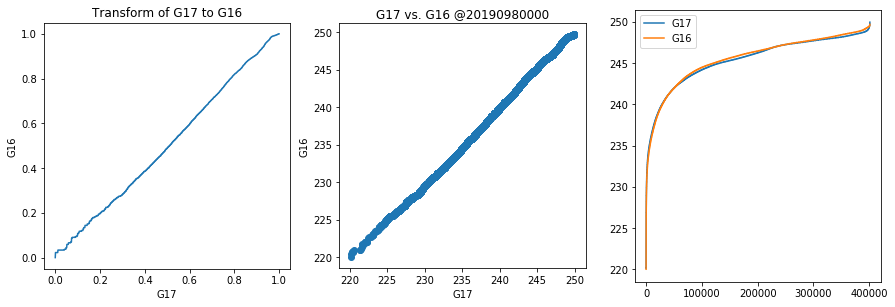

tSplice:  20190980000 , AUC:  0.500930574134252
OR_ABI-L1b-RadF-M6C08_G16_s20190980010255_e20190980019563_c20190980020009.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980010339_e20190980019406_c20190980019449.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980010255_e20190980019563_c20190980020009.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980010339_e20190980019406_c20190980019449.nc


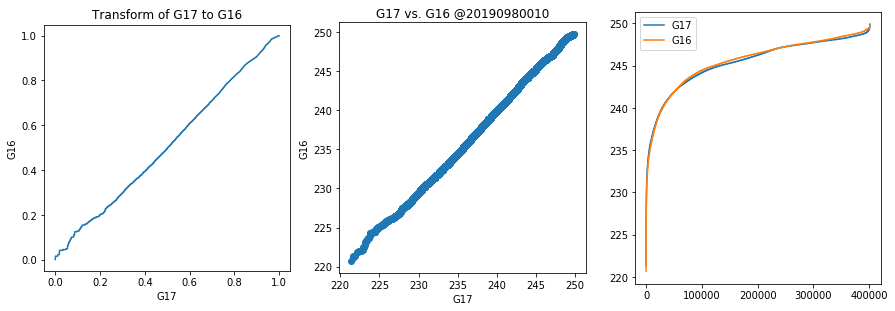

tSplice:  20190980010 , AUC:  0.5072149242732701
OR_ABI-L1b-RadF-M6C08_G16_s20190980020255_e20190980029563_c20190980030014.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980020339_e20190980029405_c20190980029448.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980020255_e20190980029563_c20190980030014.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980020339_e20190980029405_c20190980029448.nc


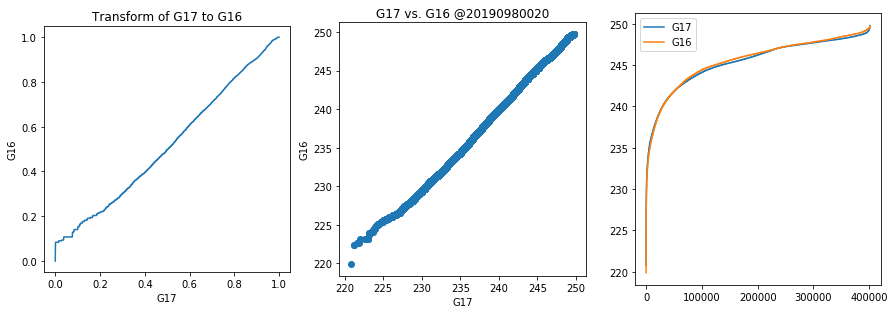

tSplice:  20190980020 , AUC:  0.5142320453831699
OR_ABI-L1b-RadF-M6C08_G16_s20190980030255_e20190980039563_c20190980040015.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980030339_e20190980039405_c20190980039449.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980030255_e20190980039563_c20190980040015.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980030339_e20190980039405_c20190980039449.nc


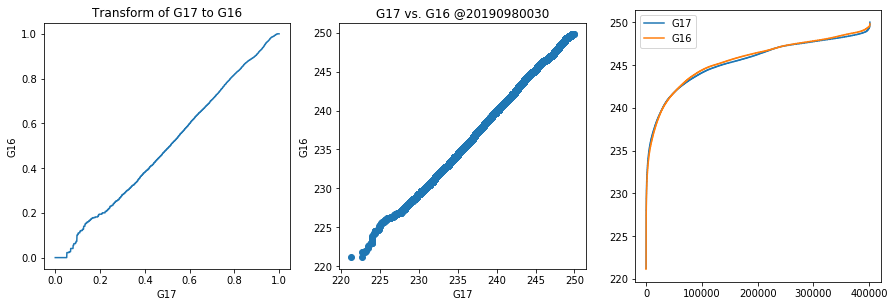

tSplice:  20190980030 , AUC:  0.49541000793208184
OR_ABI-L1b-RadF-M6C08_G16_s20190980040255_e20190980049563_c20190980050014.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980040339_e20190980049406_c20190980049449.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980040255_e20190980049563_c20190980050014.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980040339_e20190980049406_c20190980049449.nc


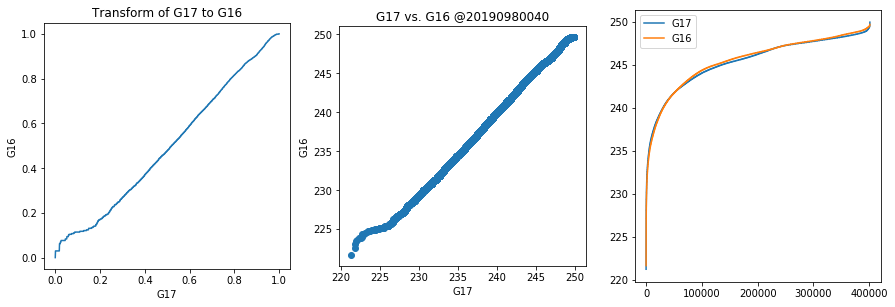

tSplice:  20190980040 , AUC:  0.4935022765517555
OR_ABI-L1b-RadF-M6C08_G16_s20190980050255_e20190980059563_c20190980100013.npy
OR_ABI-L1b-RadF-M6C08_G17_s20190980050339_e20190980059406_c20190980059449.npy
OR_ABI-L1b-RadF-M6C08_G16_s20190980050255_e20190980059563_c20190980100013.nc
OR_ABI-L1b-RadF-M6C08_G17_s20190980050339_e20190980059406_c20190980059449.nc


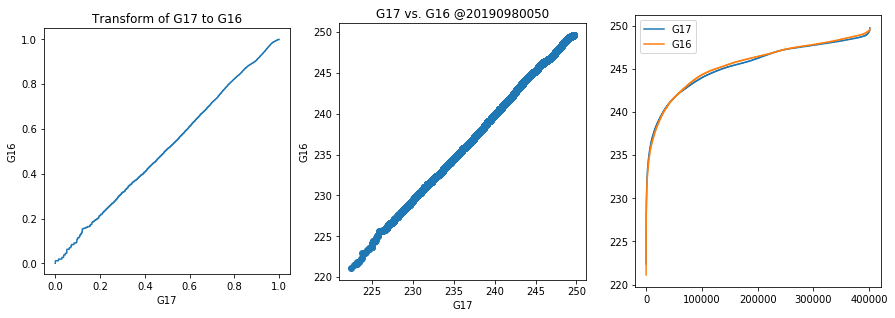

tSplice:  20190980050 , AUC:  0.5124665190810299


In [33]:
index = pd.date_range(start='04/08/2019', end='04/18/2019', freq='10T')
ind = index.strftime("%Y%j%H%M")
chart = pd.Series(data=None)
ctr = 0
#for ts, tSplice in zip(index, ind):
    #print (f'tSplice {tSplice}')
toi = ['0300','0910','1010','1350','1510','2100']

for (bb,dd) in list(itertools.product([8],range(11))):
    BB = str(bb).zfill(2)
    DD = str(dd).zfill(3)
    for t in toi:
        tSplice = DD+t
        
        lookup16 = f'{BB}_G16_s{tSplice}'
        ncf16 = [f for f in os.listdir(ncPath) if re.search(lookup16,f)]
        npf16 = [f for f in os.listdir(npPath) if re.search(lookup16,f)]

        lookup17 = f'{BB}_G17_s{tSplice}'
        ncf17 = [f for f in os.listdir(ncPath) if re.search(lookup17,f)]
        npf17 = [f for f in os.listdir(npPath) if re.search(lookup17,f)] 

        #print('ncf16: ',ncf16)
        #print('ncf17: ',ncf17)
        #print('npf16: ',npf16)
        #print('npf17: ',npf17)

        if len(ncf16) + len(ncf17)!=2:
            continue

        imageBox16 = np.load(op.join(npPath,npf16[0]))   
        myFile16 = xr.open_dataset(op.join(ncPath,ncf16[0]))
        planck_fk1_16 = float(myFile16['planck_fk1'].data)
        planck_fk2_16 = float(myFile16['planck_fk2'].data) 
        planck_bc1_16 = float(myFile16['planck_bc1'].data)                       
        planck_bc2_16 = float(myFile16['planck_bc2'].data)     
        T16 = file2BT(imageBox16.ravel(), planck_fk1_16, 
                      planck_fk2_16, planck_bc1_16, planck_bc2_16)#unfilterd

        imageBox17 = np.load(op.join(npPath,npf17[0]))
        myFile17 = xr.open_dataset(op.join(ncPath,ncf17[0]))
        planck_fk1_17 = float(myFile17['planck_fk1'].data)
        planck_fk2_17 = float(myFile17['planck_fk2'].data) 
        planck_bc1_17 = float(myFile17['planck_bc1'].data)                       
        planck_bc2_17 = float(myFile17['planck_bc2'].data)     
        T17 = file2BT(imageBox17.ravel(), planck_fk1_17, planck_fk2_17, 
                      planck_bc1_17, planck_bc2_17)#unfilterd

        print(npf16[0])
        print(npf17[0])
        print(ncf16[0])
        print(ncf17[0])

        rc= np.vstack([T16, T17])
        XY = rc[:,np.isfinite(rc).all(axis=0)]
        G16 = XY[0]
        G17 = XY[1]

        _G17 = np.linspace(G17.min(), G17.max(), 1000)
        B = [st.scoreatpercentile(G16, st.percentileofscore(G17,g17s,
            kind='strict')) for g17s in _G17]

        _B = (B - min(B))/(max(B) - min(B))
        _G17n = (_G17 - min(_G17))/(max(_G17) - min(_G17))

        AUC = sum(_B)/1000
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (15,5))
        _ = ax1.plot(_G17n,_B, legend=f"AUC: {AUC}")
        _ = ax1.set_ylabel('G16')
        _ = ax1.set_xlabel('G17')
        _ = ax1.set_title('Transform of G17 to G16')
        _ = ax1.set_aspect('equal')

        _ = ax2.scatter(G17, G16)
        _ = ax2.set_ylabel('G16')
        _ = ax2.set_xlabel('G17')
        _ = ax2.set_title(f'G17 vs. G16 @{tSplice}')
        _ = ax2.set_aspect('equal')

        #_ = ax3.hist(G17, label='G17', histtype='step')
        #_ = ax3.hist(G16, label='G16', histtype='step')
        _ = ax3.plot(sorted(G17), label='G17')
        _ = ax3.plot(sorted(G16), label='G16')
        _ = ax3.legend(loc = 'upper left')
        plt.show()
        chart[ts] = AUC
        print("tSplice: ",tSplice,', AUC: ',AUC)
        '''
        ctr+=1
        if ctr>5:
            break
        '''
        
        fig.savefig('..'+ op.join(DATAPATH,
            f"validation/G_{SS}_band{BB}_04-{str(8+dd).zfill(2)}-2019_{tSplice}"))
        
fig, ax = plt.subplots()
chart.plot(ax=ax)


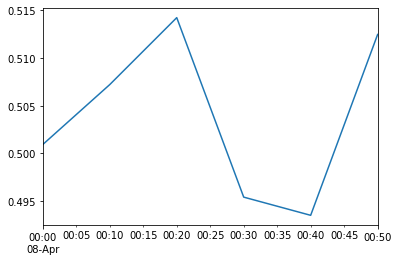

In [39]:
#https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
#https://matplotlib.org/api/dates_api.html
import matplotlib.dates as mdates
fig, ax = plt.subplots()
chart.plot(ax=ax)

# AMS Presentation Material

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

index = pd.date_range(start='04/08/2019', end='04/18/2019', freq='10T')
ind = index.strftime("%Y%j%H%M")
chart = pd.Series(data=None)
ctr = 0
day = 8
SS = '17vG16'
BB = str(8).zfill(2)

plabels = ['0%', '25%', '50%', '75%', '100%']

for ts, tSplice in zip(index, ind):
    lookup16 = f'{BB}_G16_s{tSplice}'
    ncf16 = [f for f in os.listdir(ncPath) if re.search(lookup16,f)]
    npf16 = [f for f in os.listdir(npPath) if re.search(lookup16,f)]

    lookup17 = f'{BB}_G17_s{tSplice}'
    ncf17 = [f for f in os.listdir(ncPath) if re.search(lookup17,f)]
    npf17 = [f for f in os.listdir(npPath) if re.search(lookup17,f)] 

    #print('ncf16: ',ncf16)
    #print('ncf17: ',ncf17)
    #print('npf16: ',npf16)
    #print('npf17: ',npf17)

    if len(ncf16) + len(ncf17)!=2:
        continue

    imageBox16 = np.load(op.join(npPath,npf16[0]))   
    myFile16 = xr.open_dataset(op.join(ncPath,ncf16[0]))
    planck_fk1_16 = float(myFile16['planck_fk1'].data)
    planck_fk2_16 = float(myFile16['planck_fk2'].data) 
    planck_bc1_16 = float(myFile16['planck_bc1'].data)                       
    planck_bc2_16 = float(myFile16['planck_bc2'].data)     
    T16 = file2BT(imageBox16.ravel(), planck_fk1_16, 
                  planck_fk2_16, planck_bc1_16, planck_bc2_16)#unfilterd

    imageBox17 = np.load(op.join(npPath,npf17[0]))
    myFile17 = xr.open_dataset(op.join(ncPath,ncf17[0]))
    planck_fk1_17 = float(myFile17['planck_fk1'].data)
    planck_fk2_17 = float(myFile17['planck_fk2'].data) 
    planck_bc1_17 = float(myFile17['planck_bc1'].data)                       
    planck_bc2_17 = float(myFile17['planck_bc2'].data)     
    T17 = file2BT(imageBox17.ravel(), planck_fk1_17, planck_fk2_17, 
                  planck_bc1_17, planck_bc2_17)#unfilterd

    rc= np.vstack([T16, T17])
    XY = rc[:,np.isfinite(rc).all(axis=0)]
    G16 = XY[0]
    G17 = XY[1]

    _G17 = np.linspace(G17.min(), G17.max(), 1000)
    B = [st.scoreatpercentile(G16, st.percentileofscore(G17,g17s,
        kind='strict')) for g17s in _G17]

    _B = (B - min(B))/(max(B) - min(B))
    _G17n = (_G17 - min(_G17))/(max(_G17) - min(_G17))

    AUC = round(sum(_B)/1000,5)
    chart[ts] = AUC
    
    if tSplice[-4:] in ['0300','0910','1010','1350','1510','2100']:
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (15,5))
        _ = ax1.plot(_G17n,_B, label=f"AUC: {AUC}")
        _ = ax1.set_ylabel('G16')
        _ = ax1.set_xlabel('G17')
        _ = ax1.set_title('Transform of G17 to G16')
        _ = ax1.set_aspect('equal')
        _ = ax1.legend(loc = 'upper left')

        _ = ax2.scatter(G17, G16)
        _ = ax2.set_ylabel('G16')
        _ = ax2.set_xlabel('G17')
        _ = ax2.set_title(f'G17 vs. G16 @{tSplice}')
        _ = ax2.set_aspect('equal')

        #_ = ax3.hist(G17, label='G17', histtype='step')
        #_ = ax3.hist(G16, label='G16', histtype='step')
        xticks = [st.scoreatpercentile(xticks, p) for p in [0, 25, 50, 75, 100]]
        _ = ax3.plot(sorted(G17), label='G17')
        _ = ax3.plot(sorted(G16), label='G16')
        _ = ax3.legend(loc = 'upper left')
        _ = ax3.set_title(f'Empirical CDF for Apr-{day}-2019')
        _ = ax3.set_xticks(xticks)
        _ = ax3.set_xticklabels(plabels)
        _ = ax3.xlabel('quantiles')
        _ = ax3.ylabel('Temperature')
        
        plt.show()
        
        fig.savefig('..'+ op.join(DATAPATH,
            f"validation/G_{SS}_band{BB}_04-{str(8+dd).zfill(2)}-2019_{tSplice}"))
    
    if ts.day != day:
        fig2, ax0 = plt.subplots()
        chart.plot(ax=ax0)
        
        fig2.savefig('..'+ op.join(DATAPATH,
            f"validation/AUC/G_{SS}_band{BB}_04-{str(8+dd).zfill(2)}-2019_{tSplice}"))
        
        day+=1
        chart = pd.Series(data=None)
    
    print("tSplice: ",tSplice,', AUC: ',AUC)
    
    
